<a href="https://colab.research.google.com/github/kelgruber/bear-cnn-classification/blob/main/Kel_Gruber_Practice_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice Project Task 1 Building an Overfitting Model

Kel Gruber

## Dataset - Bears Classification
Goal is to classify images of grizzly, panda, and polar bears.
Dataset was created by Shaney Flores and consists of over 1000 digital colored images of grizzly, panda, and polar bears were downloaded from an Internet image search.
Dataset can be found and downloaded from [Shaney Flores's Github](https://github.com/shaneyflores/Classifying-Bear-Species-DL/blob/main/bears_ws.zip).

##1. Load Dataset

### Import libaries and connect to Drive

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###Import Dataset from Drive and Unzip

In [ ]:
import zipfile
import os
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Bears Classification/bears_ws.zip')
zip_train.extractall('/tmp')
zip_train.close()

###Import Training Dataset

In [ ]:
image_generator = ImageDataGenerator(rescale=1./255)

training_data = image_generator.flow_from_directory( '/tmp/bears/training', target_size=(256, 256), batch_size=9, class_mode='categorical')
print(training_data.image_shape)

Found 718 images belonging to 3 classes.
(256, 256, 3)


###View Some Examples from the Training Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

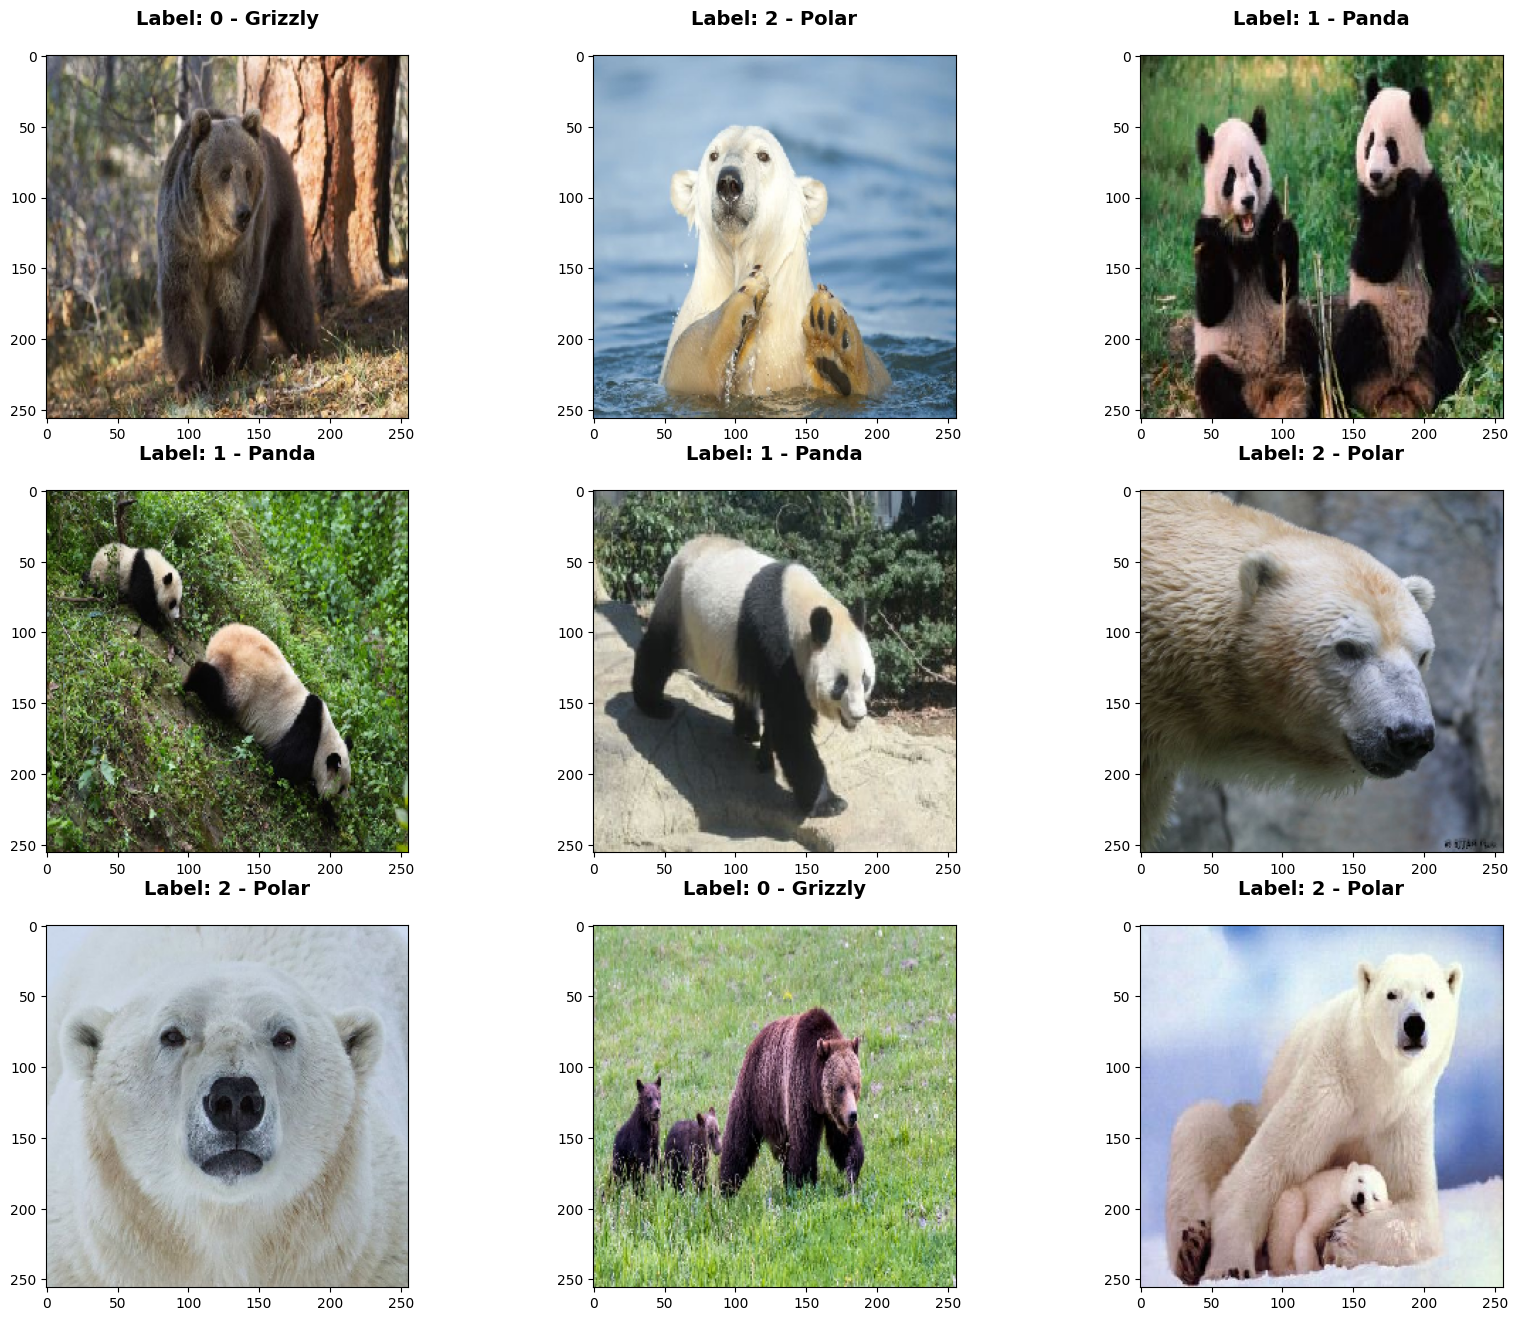

In [ ]:

i = 3
label_category = {0: "Grizzly", 1: "Panda", 2: "Polar"}

plt.figure(figsize=(20,16))
for batch in training_data:
  images = batch[0]
  labels = batch[1]
  for row in range(0,3):
    for column in range(0,3):
      plt.subplot(i,i,row * i + column + 1)
      plt.imshow(images[row * i + column])
      label_index = row * 3 + column
      label = np.argmax(labels[label_index])
      plt.text(0.5, 1.1, f"Label: {label} - {label_category[label]}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes, fontsize=14, fontweight='bold')
  break

##2. Build an Overfit Model

To construct an overfit model we will begin by importing a new overfit dataset file called "bears_overfit_data.zip" that contains all of our data. For this particular task we will not split our data into the training, validation and testing sets because we want to build an overfit model. Our goal in this phase is find the smallest model that can memorize all of the data. An important note is that by "smallest model" we are not looking for the model with the fewest layers, instead we are looking to construct a model with the fewest parameters that is still capable of memorizing the entire dataset.

In [ ]:
zip_train = zipfile.ZipFile('/content/drive/MyDrive/Bears Classification/bears_overfit_data.zip')
zip_train.extractall('/tmp')
zip_train.close()

#Normalize the data
image_generator = ImageDataGenerator(rescale=1./255)

overfit_data = image_generator.flow_from_directory( '/tmp/bears_overfit_data', target_size=(256, 256), batch_size=1, class_mode='categorical')
print(overfit_data.image_shape)

Found 1198 images belonging to 3 classes.
(256, 256, 3)


###2.1 Overfit Model 1

Model Structure:
- 3 Convolutional layers with 64, 32 and 16 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with (4,4) pooling windows
- 1 Flatten Layer after the 3rd convolutional layer
- 2 Dense layers with 10 and 3 neurons using a relu and softmax activation function, respectively

We will begin by trying the suggested example model in the Task 1 prompt. The only change made to this suggested model was to change the number of neurons in the last layer from 10 to 3 neurons to match the number of classes in our problem.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [ ]:
overfit_model_1 = Sequential()
overfit_model_1.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = overfit_data.image_shape ) )
overfit_model_1.add( MaxPool2D(4, 4) )
overfit_model_1.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_1.add( MaxPool2D(4, 4) )
overfit_model_1.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
overfit_model_1.add( Flatten() )
overfit_model_1.add( Dense( 10, activation = 'relu' ) )
overfit_model_1.add( Dense(3, activation = 'softmax' ) )

overfit_model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 flatten_1 (Flatten)         (None, 2704)             

In [ ]:
overfit_model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history1 = overfit_model_1.fit(overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
1198/1198 [==============================] - 16s 11ms/step - loss: 1.1002 - accuracy: 0.3272
Epoch 2/100
1198/1198 [==============================] - 12s 10ms/step - loss: 1.0337 - accuracy: 0.4925
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.8322 - accuracy: 0.6686
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.6557 - accuracy: 0.7437
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.4276 - accuracy: 0.8489
Epoch 6/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.2909 - accuracy: 0.8940
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.2088 - accuracy: 0.9240
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.1416 - accuracy: 0.9574
Epoch 9/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.0900 - accuracy: 0.9699
Epoch 10/100
1198/1198 [==============================] - 10s 8ms/st

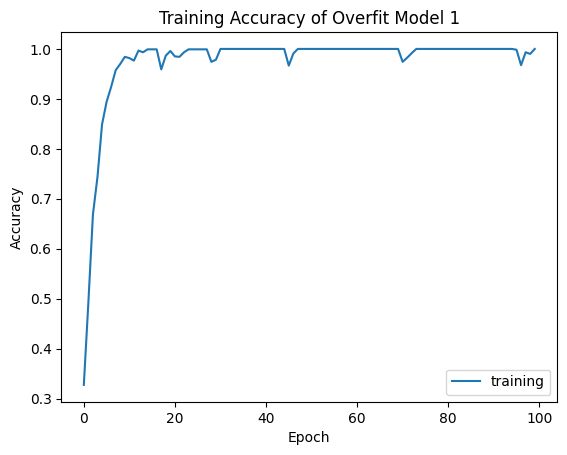

In [ ]:
plt.title('Training Accuracy of Overfit Model 1')
plt.plot(history1.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_1.evaluate(overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

1198/1198 [==============================] - 7s 6ms/step - loss: 1.2232e-04 - accuracy: 1.0000
Accuracy: 100.0
Loss:0.00012232104199938476


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(overfit_data)):
   x, y = overfit_data.next()
   p = overfit_model_1.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###2.2 Overfit Model 2
Model Structure:
- 3 Convolutional layers with 64, 32, and 16 kernels, each using a relu activation function
- 2 MaxPool layers that follow the first and second convolutional layers with a (4,4) pooling windows
- 1 Flatten Layer after the third convulutional layer
- 1 Dense Layer with 3 neurons using a softmax activation function

Since the first model easily overfit the data to try to reduce the total parameters in the model I have removed the first dense layer with 10 neurons to see if the model can still overfit without it. This reduces the total parameters from 51,963 to 32,995.

In [ ]:
overfit_model_2 = Sequential()
overfit_model_2.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = overfit_data.image_shape ) )
overfit_model_2.add( MaxPool2D(4, 4) )
overfit_model_2.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_2.add( MaxPool2D(4, 4) )
overfit_model_2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
overfit_model_2.add( Flatten() )
overfit_model_2.add( Dense(3, activation = 'softmax' ) )

overfit_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 63, 63, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 61, 61, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 flatten_2 (Flatten)         (None, 2704)             

In [ ]:
overfit_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history2 = overfit_model_2.fit(overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
1198/1198 [==============================] - 10s 7ms/step - loss: 0.9630 - accuracy: 0.5083
Epoch 2/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.5011 - accuracy: 0.8030
Epoch 3/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.3585 - accuracy: 0.8606
Epoch 4/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.3227 - accuracy: 0.8731
Epoch 5/100
1198/1198 [==============================] - 14s 11ms/step - loss: 0.2901 - accuracy: 0.8998
Epoch 6/100
1198/1198 [==============================] - 11s 9ms/step - loss: 0.2536 - accuracy: 0.9032
Epoch 7/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.2321 - accuracy: 0.9149
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.1780 - accuracy: 0.9324
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.1266 - accuracy: 0.9541
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/st

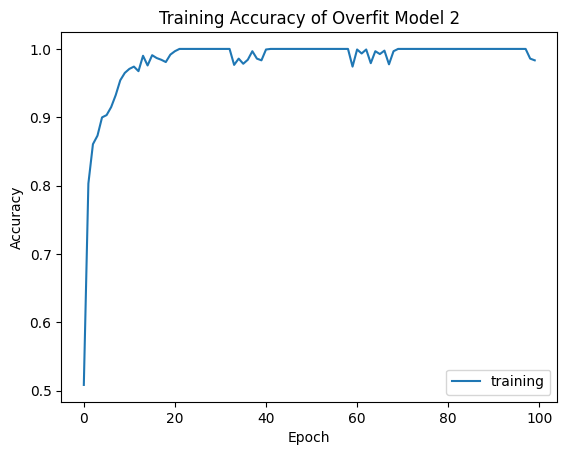

In [ ]:
plt.title('Training Accuracy of Overfit Model 2')
plt.plot(history2.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_2.evaluate(overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

1198/1198 [==============================] - 8s 7ms/step - loss: 0.0301 - accuracy: 0.9933
Accuracy: 99.33221936225891
Loss:0.03005775809288025


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(overfit_data)):
   x, y = overfit_data.next()
   p = overfit_model_2.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.993322203672788
Precision: 0.9933831367025282
Recall: 0.993322203672788
F1 Score: 0.9933210353587719


###2.3 Overfit Model 3
Model Structure:
- 3 Convolutional layers with 64, 32, and 16 kernels, each using a relu activation function
- 2 MaxPools that follow the first and second convolutional layers with (5,5) pooling window
- 1 Flatten Layer after the 4th convulutional layer
- 1 Dense layer with 3 neurons using a softmax activation function

Since the second model almost asily overfit the data, it would have only needed more training or model check pointing to save the 100% accuracy overfit model. Since removing convolutional layers or adding convolutional layers will add parameters to the model and reduce them, I decided to increase the maxpooling windows because this will reduce the number of parameters in the network. In this model the windows were changed from (4,4) to (5,5). This reduces the total parameters from 32,995 to 27,235.

In [ ]:
overfit_model_3 = Sequential()
overfit_model_3.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = overfit_data.image_shape ) )
overfit_model_3.add( MaxPool2D(5, 5) )
overfit_model_3.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_3.add( MaxPool2D(5, 5) )
overfit_model_3.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
overfit_model_3.add( Flatten() )
overfit_model_3.add( Dense(3, activation = 'softmax' ) )

overfit_model_3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 50, 50, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 7, 7, 16)          4624      
                                                                 
 flatten_3 (Flatten)         (None, 784)              

In [ ]:
overfit_model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history3 = overfit_model_3.fit(overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
1198/1198 [==============================] - 10s 7ms/step - loss: 0.7188 - accuracy: 0.6686
Epoch 2/100
1198/1198 [==============================] - 10s 8ms/step - loss: 0.4214 - accuracy: 0.8364
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.3434 - accuracy: 0.8773
Epoch 4/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.2740 - accuracy: 0.8990
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.2226 - accuracy: 0.9157
Epoch 6/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.2002 - accuracy: 0.9265
Epoch 7/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.1549 - accuracy: 0.9466
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.1303 - accuracy: 0.9508
Epoch 9/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.1338 - accuracy: 0.9524
Epoch 10/100
1198/1198 [==============================] - 9s 8ms/step -

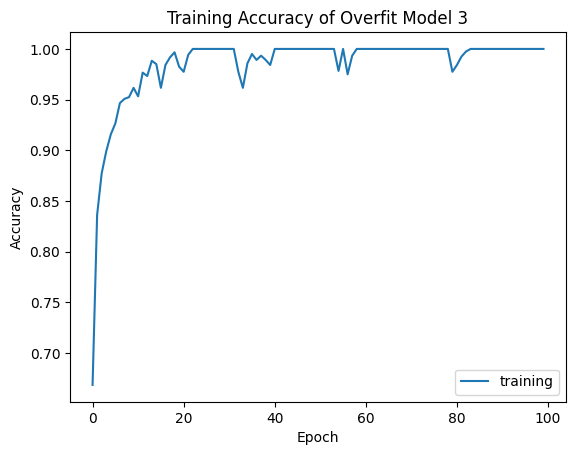

In [ ]:
plt.title('Training Accuracy of Overfit Model 3')
plt.plot(history3.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_3.evaluate(overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

1198/1198 [==============================] - 7s 6ms/step - loss: 3.3832e-09 - accuracy: 1.0000
Accuracy: 100.0
Loss:3.383234803422397e-09


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(overfit_data)):
   x, y = overfit_data.next()
   p = overfit_model_3.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###2.4 Overfit Model 4
Model Structure:
- 3 Convolutional layers with 64, 32, and 16 kernels, each using a relu activation function
- 2 MaxPools that follow the first and second convolutional layers with larger filters of (9, 9) and (7,7) to reduce the parameters in the network even more
- 1 Flatten Layer after the 3rd convolutional layer
- 1 Dense layer with 3 neurons using a softmax activation function

The third model above also easily overfits the data. I tried changing the number of convolutional layers again and found that even with increased maxpooling layers it increased the number of parameters in the network. So I decided to increase the maxpooling windows again. In this model the windows were changed from (5,5) to (9, 9) and (7,7) respectively. These are the largest maxpooling windows I could create in this current architecture and reduces the total parameters from 27,235 to 24,931 total parameters.

In [ ]:
overfit_model_4 = Sequential()
overfit_model_4.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = overfit_data.image_shape ) )
overfit_model_4.add( MaxPool2D(9, 9) )
overfit_model_4.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
overfit_model_4.add( MaxPool2D(7, 7) )
overfit_model_4.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
overfit_model_4.add( Flatten() )
overfit_model_4.add( Dense(3, activation = 'softmax' ) )

overfit_model_4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 28, 28, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 3, 3, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 1, 1, 16)          4624      
                                                                 
 flatten_6 (Flatten)         (None, 16)               

In [ ]:
overfit_model_4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history4 = overfit_model_4.fit(overfit_data, epochs = 100, batch_size = 64)

Epoch 1/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.8922 - accuracy: 0.5634
Epoch 2/100
1198/1198 [==============================] - 9s 7ms/step - loss: 0.5038 - accuracy: 0.8189
Epoch 3/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.3831 - accuracy: 0.8581
Epoch 4/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.3225 - accuracy: 0.8848
Epoch 5/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.2635 - accuracy: 0.9090
Epoch 6/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.2235 - accuracy: 0.9290
Epoch 7/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.1972 - accuracy: 0.9232
Epoch 8/100
1198/1198 [==============================] - 8s 7ms/step - loss: 0.1687 - accuracy: 0.9374
Epoch 9/100
1198/1198 [==============================] - 9s 8ms/step - loss: 0.1520 - accuracy: 0.9416
Epoch 10/100
1198/1198 [==============================] - 14s 11ms/step -

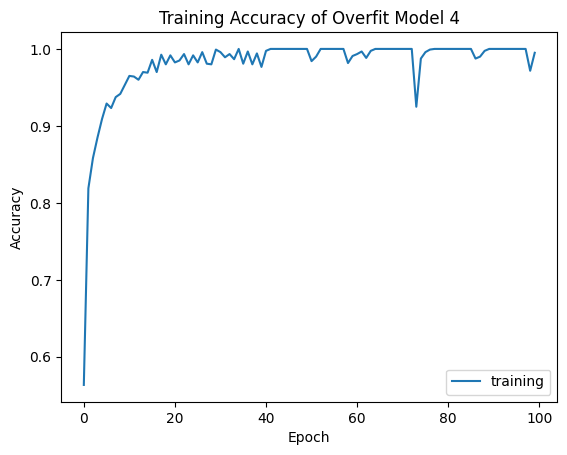

In [ ]:
plt.title('Training Accuracy of Overfit Model 4')
plt.plot(history4.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
loss, acc = overfit_model_4.evaluate(overfit_data)

print(f'Accuracy: {acc*100.0}')
print(f'Loss:{loss}')

1198/1198 [==============================] - 8s 6ms/step - loss: 0.0014 - accuracy: 1.0000
Accuracy: 100.0
Loss:0.001420534448698163


In [ ]:
# Get predictions from model
P = [] # empty list of predictions
Y_true = []
for i in range(len(overfit_data)):
   x, y = overfit_data.next()
   p = overfit_model_4.predict(x, verbose = 0)
   Y_true.extend(y)
   P.extend(p)

In [ ]:
# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(P, axis=1)
Y_true = np.argmax(Y_true, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###2.5 Conclusion
For this small problem it did not take a very large CNN to overfit this data. In all models I tried, it was possible to overfit with only Model 2 not fully overfitting in the 100 epochs but most likely with a little more training it would have been fully overfit as well. We trained our model on all of our data so when we evaluate the model's predictions on the same data set it has a perfect 100% on accuracy, precision, recall, and F1 score because it has fully memorized the data, where these scores would vary would be when we introduce never before seen data to the model, then these scores would probably be quite low. The only exception was Model 2 which has 99.33% on accuracy, precision, recall, and F1 score since it did not fully overfit during training but as shown by these scores it was very close and it has memorized most of the dataset.

##3. Providing the Output as Input Model
If we provide the output as the input (as an additional channel), what is the smallest architecture (minimum number of layers and filters) needed to overfit the data?

###3.1 Making a Dataset that includes the Output as Input

In [ ]:
single_image_generator = image_generator.flow_from_directory('/tmp/bears_overfit_data', target_size=(256, 256), batch_size=1, class_mode='categorical')

mydatax = np.zeros((single_image_generator.n, 256, 256, 3 + 1))  # One additional channel for labels
mydatay = np.zeros((single_image_generator.n, 3))

# Read generator, and fill up the mydatax/mydatay arrays
for i in range(single_image_generator.n):
    x, y = single_image_generator.next()  # Get images and labels from the generator
    # y is one-hot encoded, need to convert y to a single value
    mydatax[i, :, :, :3] = x  # Existing image in the first three channels
    mydatax[i, :, :, 3] = np.argmax(y, axis=1)  # Label value as the last channel
    mydatay[i] = y

# Print shapes to verify
print("Images Shape:", mydatax.shape)
print("Labels Shape:", mydatay.shape)

Found 1198 images belonging to 3 classes.
Images Shape: (1198, 256, 256, 4)
Labels Shape: (1198, 3)


###3.2 Building Output as Input Model 1

In [ ]:
output_model_1 = Sequential()
output_model_1.add( Conv2D( 64, ( 3, 3 ), activation = 'relu', input_shape = (256, 256, 4) ) )
output_model_1.add( MaxPool2D(5, 5) )
output_model_1.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
output_model_1.add( MaxPool2D(5, 5) )
output_model_1.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
output_model_1.add( Flatten() )
output_model_1.add( Dense(3, activation = 'softmax' ) )

output_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 64)      2368      
                                                                 
 max_pooling2d (MaxPooling2  (None, 50, 50, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 48, 48, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 9, 9, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 16)          4624      
                                                                 
 flatten (Flatten)           (None, 784)               0

In [ ]:
output_model_1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history_output_1 = output_model_1.fit(mydatax, mydatay, epochs = 50, batch_size = 64)

Epoch 1/50
19/19 [==============================] - 9s 169ms/step - loss: 0.4972 - accuracy: 0.7905
Epoch 2/50
19/19 [==============================] - 2s 115ms/step - loss: 0.0079 - accuracy: 1.0000
Epoch 3/50
19/19 [==============================] - 2s 105ms/step - loss: 3.0152e-04 - accuracy: 1.0000
Epoch 4/50
19/19 [==============================] - 2s 112ms/step - loss: 1.7313e-04 - accuracy: 1.0000
Epoch 5/50
19/19 [==============================] - 2s 97ms/step - loss: 1.1463e-04 - accuracy: 1.0000
Epoch 6/50
19/19 [==============================] - 2s 103ms/step - loss: 3.4162e-05 - accuracy: 1.0000
Epoch 7/50
19/19 [==============================] - 2s 97ms/step - loss: 2.4654e-05 - accuracy: 1.0000
Epoch 8/50
19/19 [==============================] - 2s 99ms/step - loss: 2.1504e-05 - accuracy: 1.0000
Epoch 9/50
19/19 [==============================] - 2s 117ms/step - loss: 1.9678e-05 - accuracy: 1.0000
Epoch 10/50
19/19 [==============================] - 2s 106ms/step - loss: 

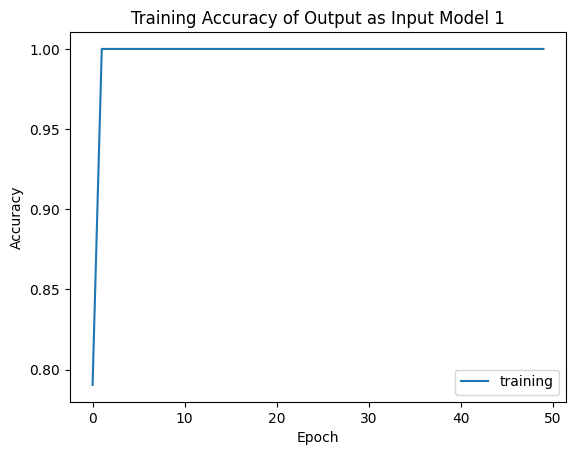

In [ ]:
plt.title('Training Accuracy of Output as Input Model 1')
plt.plot(history_output_1.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
predictions = output_model_1.predict(mydatax)

# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(predictions, axis=1)
Y_true = np.argmax(mydatay, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

38/38 [==============================] - 1s 26ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###3.3 Building Output as Input Model 2

In [ ]:
output_model_2 = Sequential()
output_model_2.add( Conv2D( 64, ( 3, 3 ), activation = 'relu',  input_shape = (256, 256, 4) ) )
output_model_2.add( MaxPool2D(9, 9) )
output_model_2.add( Conv2D( 32, ( 3, 3 ), activation = 'relu' ) )
output_model_2.add( MaxPool2D(7, 7) )
output_model_2.add( Conv2D( 16, ( 3, 3 ), activation = 'relu' ) )
output_model_2.add( Flatten() )
output_model_2.add( Dense(3, activation = 'softmax' ) )

output_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 64)      2368      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 28, 28, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        18464     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 3, 3, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 1, 16)          4624      
                                                                 
 flatten_1 (Flatten)         (None, 16)               

In [ ]:
output_model_2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history_output_2 = output_model_2.fit(mydatax, mydatay, epochs = 50, batch_size = 64)

Epoch 1/50
19/19 [==============================] - 4s 103ms/step - loss: 0.5716 - accuracy: 0.8614
Epoch 2/50
19/19 [==============================] - 2s 103ms/step - loss: 0.0234 - accuracy: 0.9992
Epoch 3/50
19/19 [==============================] - 2s 111ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 4/50
19/19 [==============================] - 2s 100ms/step - loss: 5.8580e-04 - accuracy: 1.0000
Epoch 5/50
19/19 [==============================] - 2s 93ms/step - loss: 7.9007e-04 - accuracy: 1.0000
Epoch 6/50
19/19 [==============================] - 2s 93ms/step - loss: 3.8139e-04 - accuracy: 1.0000
Epoch 7/50
19/19 [==============================] - 2s 94ms/step - loss: 2.5709e-04 - accuracy: 1.0000
Epoch 8/50
19/19 [==============================] - 2s 93ms/step - loss: 2.2075e-04 - accuracy: 1.0000
Epoch 9/50
19/19 [==============================] - 2s 93ms/step - loss: 1.6702e-04 - accuracy: 1.0000
Epoch 10/50
19/19 [==============================] - 2s 112ms/step - loss: 1.6698

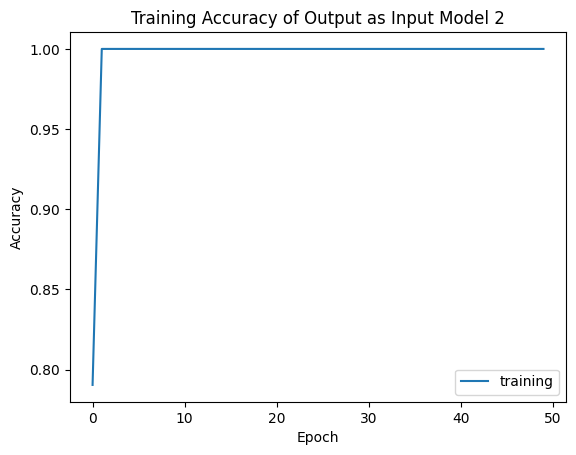

In [ ]:
plt.title('Training Accuracy of Output as Input Model 2')
plt.plot(history_output_1.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
predictions = output_model_2.predict(mydatax)

# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(predictions, axis=1)
Y_true = np.argmax(mydatay, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

38/38 [==============================] - 1s 28ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###3.4 Building Output as Input Model 3

In [ ]:
output_model_3 = Sequential()
output_model_3.add( Conv2D( 16, ( 3, 3 ), activation = 'relu',  input_shape = (256, 256, 4) ) )
output_model_3.add( MaxPool2D(9, 9) )
output_model_3.add( Flatten() )
output_model_3.add( Dense(3, activation = 'softmax' ) )

output_model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      592       
                                                                 
 max_pooling2d (MaxPooling2  (None, 28, 28, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 12544)             0         
                                                                 
 dense (Dense)               (None, 3)                 37635     
                                                                 
Total params: 38227 (149.32 KB)
Trainable params: 38227 (149.32 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
output_model_3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy')
history_output_3 = output_model_3.fit(mydatax, mydatay, epochs = 50, batch_size = 64)

Epoch 1/50
19/19 [==============================] - 5s 86ms/step - loss: 0.4011 - accuracy: 0.8272
Epoch 2/50
19/19 [==============================] - 2s 81ms/step - loss: 0.0403 - accuracy: 0.9908
Epoch 3/50
19/19 [==============================] - 2s 90ms/step - loss: 0.0148 - accuracy: 0.9992
Epoch 4/50
19/19 [==============================] - 1s 73ms/step - loss: 0.0085 - accuracy: 0.9992
Epoch 5/50
19/19 [==============================] - 1s 72ms/step - loss: 0.0054 - accuracy: 0.9992
Epoch 6/50
19/19 [==============================] - 1s 62ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 7/50
19/19 [==============================] - 1s 57ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 8/50
19/19 [==============================] - 1s 57ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 9/50
19/19 [==============================] - 1s 58ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 10/50
19/19 [==============================] - 1s 78ms/step - loss: 0.0015 - accuracy: 1.0000
Epoch 11/

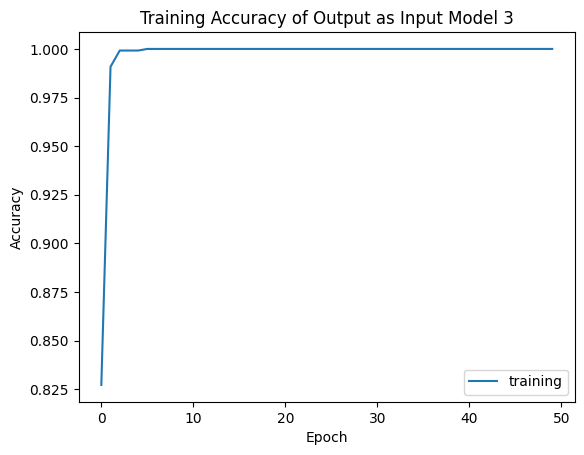

In [ ]:
plt.title('Training Accuracy of Output as Input Model 3')
plt.plot(history_output_3.history['accuracy'])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training'], loc="lower right")
plt.show()

In [ ]:
predictions = output_model_3.predict(mydatax)

# Convert predicted probabilities to binary predictions (0 or 1)
Y_pred = np.argmax(predictions, axis=1)
Y_true = np.argmax(mydatay, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average='weighted')
recall = recall_score(Y_true, Y_pred, average='weighted')
f1 = f1_score(Y_true, Y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

38/38 [==============================] - 1s 27ms/step
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


###3.5 Output as Input Conclusion
You do not need a very deep or large model when using the output as input to build an overfit model. In model 3.4 I built a shallow model that only had 1 convolutional layer and 1 dense neuron layer and it was able to overfit as easily as the other networks with 3 convolutional layers. In fact I do not think you even need to use convolutional layers when you provide the output as input and you could probably just use dense layers which would then memorize the labels from the output channel. However the convolutional layers help reduce the total number of parameters in the network which helps it run faster with fewer calculations.